In [1]:
import numpy as np
from IPython.display import display, Math
from sympy import *
from sympy.matrices import *
from sympy.plotting.plot import *
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal
init_printing(use_latex="mathjax")
%matplotlib inline

#Questão 1

## A

Conforme a equação 2.7 (página 30) de Theodoridis.

In [2]:
x   = MatrixSymbol('x', 2, 1)
mi  = MatrixSymbol('\\mu', 2, 1)
cov = MatrixSymbol('\\Sigma', 2, 2)

func = - 1/2 *(x - mi).T * cov.I * (x - mi)

display(Math(r'p(w|x) = ' + latex(func)))

<IPython.core.display.Math object>

Podemos então substituir os valores dados nessa equação:

In [3]:
mi1 = Matrix([[0] ,[0]])
mi2 = Matrix([[0.5], [1]])
cov1 = cov2 = Matrix([[0.2, 0], [0, 0.2]])

pcw1 = func.subs(mi,mi1).subs(cov,cov1)
pcw2 = func.subs(mi,mi2).subs(cov,cov2)

display(Math(r'p(w_1|x) = ' + latex(pcw1)))
display(Math(r'p(w_2|x) = ' + latex(pcw2)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

De forma que nosso classificador passa a ser: $x \in w_2, if, p(w_2|x) > p(w_1|x)$

## B

Conforme equação 2.20, na página 18 do livros de Theodoridis:
$x \in w_2, if, p(x|w_2) > p(x|w_1)\frac{\lambda_{12}}\lambda_{21}$ podemos extender nosso resultado anterior da seguinte forma: $x \in w_2, if, p(x|w_2) > p(x|w_1)\frac{0.5}1$.

#Questão 2

#A

d:\Miniconda3\lib\site-packages\sympy\plotting\experimental_lambdify.py:165: UserWarning: The evaluation of the expression is problematic. We are trying a failback method that may still work. Please report this as a bug.
  warnings.warn('The evaluation of the expression is'


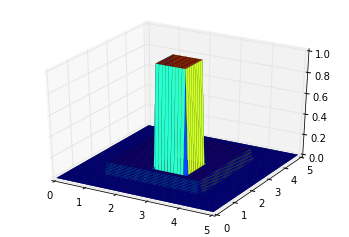

In [4]:
x, y = symbols('x y')
pa = Piecewise((1/9, And(1<= x, x <= 4, 1<= y, y <= 4)), (0, True))
pb = Piecewise((1,   And(2<= x, x <= 3, 2<= y, y <= 3)), (0, True))

plot3d(pa, pb, (x, 0, 5), (y, 0, 5), nb_of_points_x=50, nb_of_points_y=50)

#B

#Questão 3

#Questão 4

Em primeiro lugar temos de calcular o valor de $p(c_1|x)$, fazemos isso sabendo que $p(c_1|x) + p(c_2|x) = 1$:

In [5]:
pc1x = symbols('pc1x')
px = symbols('px')
pc1 = 0.6
pc2 = 0.4
pxc1 = pc1x * px / pc1
pxc2 = pxc1 / 3
pc2x = pxc2 * pc2 / px
#Resolve a equacao pc1x + pc2x = 1 para pc1x
res = solve(pc1x + pc2x - 1, pc1x)[0]
Math('p(c_1|x) = {:.3f}'.format(res))

<IPython.core.display.Math object>

Com base nisso, já podemos inferir que, dado um único padrão, a probabilidade de ele ser da classe C1 é igual ao valor acima.
Para calcular a probabilidade de ele ocorrer duas ou três vezes (maioria para os casos k = 3 e k = 5, respectivamente) é:

In [6]:
print('Para K=1 -> {:.3f}'.format(res))
print('Para k=2 -> {:.3f}'.format(res ** 2))
print('Para k=5 -> {:.3f}'.format(res ** 3))

Para K=1 -> 0.818
Para k=2 -> 0.669
Para k=5 -> 0.548


#Questão 5

#Questão 6

As funções de ativação que temos são:

In [7]:
x, y, B = symbols('x y \\beta')
eqa = 1 / (1 + exp(-B*x))
eqb = 1 / (sqrt(x ** 2 + B))

display(Math(r'a = ' + latex(eqa)))
display(Math(r'b = ' + latex(eqb)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

A função de custo é dada pela derivada da função de ativação.

In [8]:
display(Math(r'\frac{da}{dx} = ' + latex(eqa.diff(x))))
display(Math(r'\frac{db}{dx} = ' + latex(eqb.diff(x))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Como queremos que a função de custo seja dada em função da saída do neurônio (ou seja, da própria função de ativação):

In [9]:
eqa_ = eqa.diff(x).subs(eqa, y)
eqb_ = eqb.diff(x).subs(eqb, y)

display(Math(r'J(a) = ' + latex(eqa_)))
display(Math(r'J(b) = ' + latex(eqb_)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#Questão 7

Para a camada de entrada a função de ativação é dada por:

In [10]:
alpha, x0, x, w11, w21, w22, w23 = symbols('\\alpha x0 x w_1^1 w_2^1 w_2^2 w_2^3')
#x0 é o valor de entrada, w11 é o peso da primeira camada (entrada)
y11 = tanh(x0 * w11)

Já para a camada escondida as funções de ativação para os três neurônios são:

In [11]:
#Vamos definir a ativação da camada escondida em função da saída da primeira camada
y21 = exp(y11 * w21)
y22 = exp(y11 * w22)
y23 = exp(y11 * w23)

#Vamos calcular o valor de p (a saída do MLP)
p1 = y21 / (y21 + y22 + y23)
p2 = y22 / (y21 + y22 + y23)
p3 = y23 / (y21 + y22 + y23)

O calculo do valor do gradient descent é dado pela formula $w = w_{old} - \alpha * \frac{df}{dw_{old}}$

In [12]:
w11_new = w11 - alpha * y11.diff(w11)
w21_new = w21 - alpha * p1.diff(w21)
w22_new = w22 - alpha * p2.diff(w22)
w23_new = w23 - alpha * p3.diff(w23)

In [13]:
display(w11_new, w21_new, w22_new, w23_new)

            ⎛      2            ⎞      
- \alpha⋅x₀⋅⎝- tanh (w¹₁⋅x₀) + 1⎠ + w¹₁

         ⎛               w¹₂⋅tanh(w¹₁⋅x₀)                                     
         ⎜              ℯ                ⋅tanh(w¹₁⋅x₀)                        
- \alpha⋅⎜───────────────────────────────────────────────────────── - ────────
         ⎜ w¹₂⋅tanh(w¹₁⋅x₀)    w²₂⋅tanh(w¹₁⋅x₀)    w³₂⋅tanh(w¹₁⋅x₀)           
         ⎜ℯ                 + ℯ                 + ℯ                   ⎛ w¹₂⋅ta
         ⎝                                                            ⎝ℯ      

       2⋅w¹₂⋅tanh(w¹₁⋅x₀)                           ⎞      
      ℯ                  ⋅tanh(w¹₁⋅x₀)              ⎟      
────────────────────────────────────────────────────⎟ + w¹₂
                                                   2⎟      
nh(w¹₁⋅x₀)    w²₂⋅tanh(w¹₁⋅x₀)    w³₂⋅tanh(w¹₁⋅x₀)⎞ ⎟      
           + ℯ                 + ℯ                ⎠ ⎠      

         ⎛               w²₂⋅tanh(w¹₁⋅x₀)                                     
         ⎜              ℯ                ⋅tanh(w¹₁⋅x₀)                        
- \alpha⋅⎜───────────────────────────────────────────────────────── - ────────
         ⎜ w¹₂⋅tanh(w¹₁⋅x₀)    w²₂⋅tanh(w¹₁⋅x₀)    w³₂⋅tanh(w¹₁⋅x₀)           
         ⎜ℯ                 + ℯ                 + ℯ                   ⎛ w¹₂⋅ta
         ⎝                                                            ⎝ℯ      

       2⋅w²₂⋅tanh(w¹₁⋅x₀)                           ⎞      
      ℯ                  ⋅tanh(w¹₁⋅x₀)              ⎟      
────────────────────────────────────────────────────⎟ + w²₂
                                                   2⎟      
nh(w¹₁⋅x₀)    w²₂⋅tanh(w¹₁⋅x₀)    w³₂⋅tanh(w¹₁⋅x₀)⎞ ⎟      
           + ℯ                 + ℯ                ⎠ ⎠      

         ⎛               w³₂⋅tanh(w¹₁⋅x₀)                                     
         ⎜              ℯ                ⋅tanh(w¹₁⋅x₀)                        
- \alpha⋅⎜───────────────────────────────────────────────────────── - ────────
         ⎜ w¹₂⋅tanh(w¹₁⋅x₀)    w²₂⋅tanh(w¹₁⋅x₀)    w³₂⋅tanh(w¹₁⋅x₀)           
         ⎜ℯ                 + ℯ                 + ℯ                   ⎛ w¹₂⋅ta
         ⎝                                                            ⎝ℯ      

       2⋅w³₂⋅tanh(w¹₁⋅x₀)                           ⎞      
      ℯ                  ⋅tanh(w¹₁⋅x₀)              ⎟      
────────────────────────────────────────────────────⎟ + w³₂
                                                   2⎟      
nh(w¹₁⋅x₀)    w²₂⋅tanh(w¹₁⋅x₀)    w³₂⋅tanh(w¹₁⋅x₀)⎞ ⎟      
           + ℯ                 + ℯ                ⎠ ⎠      

#Questão 8

Para esse caso usaremos um único perceptron com função de ativação sendo a tangente hiperbolica, de tal modo que, o resultado de saída será 1 para a classe 1, e -1 para a classe 2. E inicareos o peso com neurônio como sendo 0.

In [14]:
from random import shuffle
#Vetores de entrada e saída
entrada = [ -2, -1, 2.5, -1.8, 3.5, 1.5, 2.1, 3.8]
saida = [ 1, 1, 1, 1, 0, 0, 0, 0]

train = list(zip(entrada, saida))

#Funcao de ativação
x, w, s = symbols('x w s')
act = tanh(x * w)
display(Math(r'act(x) = ' + latex(act)))

#De forma que a a função de custo (MSE) é
cost = s - act
display(Math(r'J(x) = ' + latex(cost)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Conforme vimos no exemplo anterior o processo de atualização, usando o gradient descent, é dado por $w = w_{old} + \alpha * \frac{df}{dw_{old}}$, de forma que temos:

In [15]:
from sympy.mpmath import nsum
y, n, alpha = symbols('y n \\alpha')
#Calcue a derivada da funcao de costo em funcao de w (usada no gradient descent)
dCost = cost.diff(w)
w_novo = w - alpha * summation(dCost, (x, 1, n))

display(Math(r'w_{novo} = ' + latex(w_novo)))

<IPython.core.display.Math object>

Inicialmente devemo então proceder interactivamente para que possamos calcular o valor final w para treinarmos o neurônio. Nesse caso vamos iniciar o valores de $w = 5$ e $\alpha = 0.5$.

In [16]:
#Valor inicial de W
w_ = 0.5
#Taxa de aprendizado
alpha = 0.5
#Inicie summ com um valor diferente de zero para ele passar pelo primeir0 loop
summ = 0.1
while abs(summ) > 0.001:
    summ = 0
    #Pegue todos os elementos de treinamento e verifique os valores obtidos
    for x_, y_ in train:
        #Verifque aqueles que estao classificados errado
        #E comece a calcular o somatorio(conforme equação acima)
        if act.subs(x, x_).subs(w, w_) != y_:
            summ += dCost.subs(w, w_).subs(x, x_).subs(y, y_).doit()            
    #Calcule o novo valor de w
    if (summ != 0):
        w_ = w_ - alpha * summ
        print("summ = {:.5f}".format(summ))
        print("w = {:.5f}".format( w_))

summ = -0.63316
w = 0.81658
summ = 0.23984
w = 0.69666
summ = 0.11299
w = 0.64016
summ = -0.00842
w = 0.64437
summ = 0.00253
w = 0.64311
summ = -0.00072
w = 0.64347


Dessa forma, temos que a a função usada para descobrir a classe qualquer novo elemento x é dada por:

In [17]:
display(Math(r'act = ' + latex(act.subs(w, w_))))

<IPython.core.display.Math object>

#Questão 9

Calculo da máxima entropia de cada um dos elementos, conforme eqs 4.113 e 4.114 de Theodoris (pgs. 218 e 219). Primeiro vamos definir algumas funções que vão nos auxiliar no calculo final.

In [18]:
def entropy(p1, p2):
    '''Calcula a entopia de um conjunto de dados que possui duas classes
    com probabilidades p1 e p2, respectivamente
    '''
    if p2 != 0:
        p2 = p2 * np.log2(p2)
    if p1 != 0:
        p1 = p1 * np.log2(p1) 
    return - (p1 + p2)

def impurity(df):
    '''Calcula a impureza de uma dada tabela de dados.
    Esse algoritmo assume que só existem duas classes 
    e que a coluna de classificacao se chama "paga"
    '''
    #Define a probabilidade inicial das classes como 0
    p1 = p2 = 0
    #Calcule as probabilidades
    res = df['paga'].value_counts()/ df.shape[0]
    #Pode ser que alguma classe não apareça, vamos checar...    
    if 0 in res:
        p1 = res[0]
    if 1 in res:
        p2 = res[1]    
    return entropy(p1, p2)

def impurity_delta(df, split):
    '''Calcula o delta da impureza da base de dados df,
    depois de se fazer uma divisão usando a coluna split.
    Assume que os valores da coluna split só podem ser 0 ou 1.
    '''
    df0 = df[df[split] == 0]    
    df1 = df[df[split] == 1]    
    ori = impurity(df)
    imp0 = impurity(df0)    
    imp1 = impurity(df1)
    delta = ori - df.shape[0] * imp0 / df0.shape[0] - df.shape[0] * imp1 / df1.shape[0]     
    return delta

Agora vamos definir nossos dados.
Note que existem alguns dados faltantes. Vamos tratar esses casos substituindo os NaN pelo modo dos valores das colunas.

In [19]:
#Codificacoes:
#universitario = 1, segundo grau =0
#salario 7k = 1, salario 2k = 0
#casa propria sim = 1, casa propria nao = 0
#sexo masculino = 1, sexo feminino = 0
#Emprestimo no prazo sim = 1, emprestimo no prazo nao = 0
dados = [[1, 1, 1, 1, 1],
         [0, np.nan, 1, 1, 1],
         [0, 0, 0, 0, 1],
         [1, 1, 0, 1, 0],
         [1, 1, 1, 1, 1],
         [1, 0, 1, 0, 1],
         [0, 1, 0, 1, 0],
         [1, 0, np.nan, 0, 1],
         [0, 0, 0, 1, 0]]

df = pd.DataFrame(dados, columns=['instrucao', 'salario', 'casa', 'sexo', 'paga'])

df['salario'] = df['salario'].fillna(df['salario'].mode()[0])
df['casa'] = df['casa'].fillna(df['casa'].mode()[0])

 Agora podemos calcular a variação da entropia para cada critério de separação.

In [20]:
print("Impurity original: {}".format(impurity(df)))
print("------")
for col in ['instrucao', 'salario', 'casa', 'sexo']:
    print("Criterio: {}".format(col))
    print("Impurity0 = {:.5f}. Impurity1 = {:.5f}".format(impurity(df[df[col] == 0]), impurity(df[df[col] == 1])))
    print("Delta criterio = {}".format(impurity_delta(df, col)))
    print("------")

Impurity original: 0.9182958340544896
------
Criterio: instrucao
Impurity0 = 1.00000. Impurity1 = 0.72193
Delta criterio = -2.6311747367427625
------
Criterio: salario
Impurity0 = 0.72193. Impurity1 = 1.00000
Delta criterio = -2.6311747367427625
------
Criterio: casa
Impurity0 = 0.97095. Impurity1 = -0.00000
Delta criterio = -0.829415235963914
------
Criterio: sexo
Impurity0 = -0.00000. Impurity1 = 1.00000
Delta criterio = -0.5817041659455104
------


Dessa forma podemos concluir que o melhor critério de separação (inicialmente), é o "sexo".

#Questão 10

<img src="foo.png">

#Questão 11

In [102]:
#Algoritmo baseado em http://www.ics.uci.edu/~smyth/courses/cs274/notes/EMnotes.pdf
#Matriz de médias (duas matrizes de 2x1)
mi1 = np.matrix([-1, -1]).T
mi2 = np.matrix([ 1,  0]).T
mi = [mi1, mi2]

#Tabela de covariância (duas matrizes de 2x2)
cov1 = np.matrix([[0.5,  0.25],[ 0.25, 0.5]])
cov2 = np.matrix([[1.0, -0.5], [-0.5,  1.0]])                
cov = [cov1, cov2]
    
norm1 = multivariate_normal(mean=mi[0].T.tolist()[0], cov=cov[0])
norm2 = multivariate_normal(mean=mi[1].T.tolist()[0], cov=cov[1])

#O array das gausianas
K = [norm1, norm2]
#A probabilidade de cada gausiana
alpha = np.matrix([ 0.5, 0.5]).T

#O array com as observacoes
X = [np.matrix([-0.5, -0.5]).T, 
     np.matrix([-1.0, -1.0]).T,
     np.matrix([ 1.0,  0.0]).T]

#Crie um array de zeroes de X x K
#
w = np.zeros([len(X), len(K)])

############
#Calculo da expectation
############
#Para todas as observacoes
for i in range(len(X)):    
    #Aplique todas as gausianas
    for j in range(len(K)):
        #E guarde o resultado        
        w[i,j] = K[j].pdf(i) * alpha[j]
    
#Calcule a soma de todas as linhas (ou seja, o valor total de K para cada observacao)
soma_w = w.sum(axis=1).reshape([3,1])
#Res agora tem a probabilidade de x(linhas) pertencer a cada uma das classes (colunas)
w = w / soma_w

############
#E agora a maximizacao
############

#Primeiro vamos atualizar os valores de alpha
#Calcule a soma dos valores do vetor res (wik)
N = w.sum(axis=0)
Ntotal = N.sum()

#E calcule a percentagem para cada um
for i in range(alpha.shape[0]):
    alpha[i] = soma[i] / soma.sum()

print("Alpha = \n{}\n--".format(alpha))

#Novo calculo das medias
#Para cada gausiana
for k in range(len(K)):
    #Calcule o somatorio de x pelo peso da gausiana para aquele elemento
    somatorio = 0
    for i in range(len(X)):
        somatorio += w[i,k] * X[i]
            
    mi[k] = somatorio/N[k]
    
print("mi[0]= \n{}\nmi[1]= \n{}\n--".format(mi[0], mi[1]))
    
#Calculo da nova covariancia
#Para cada gausiana
for k in range(len(K)):
    #Calcule o somatorio
    somatorio = 0
    
    for i in range(len(X)):    
        somatorio += w[i,k] * (X[i] - mi[k]) * (X[i] - mi[k]).T
        
    cov[k] = somatorio / N[k]
    
print("covariancia[0] = \n{}\ncovariancia[1] =\n{}".format(cov[0], cov[1]))

Alpha = 
[[ 0.17546159]
 [ 0.82453841]]
--
mi[0]= 
[[-0.51381566]
 [-0.51629499]]
mi[1]= 
[[-0.09279344]
 [-0.49653243]]
--
covariancia[0] = 
[[ 0.01415493  0.01040169]
 [ 0.01040169  0.00912163]]
covariancia[1] =
[[ 0.84179651  0.40059319]
 [ 0.40059319  0.20012369]]


#Questão 12


#Questão 13

#Questão 14

#Questão 15

#Questão 16